```
Dựa trên dữ liệu ‘sample_data.csv.gz’ (trong buổi lecture4) về các tin rao vặt, thực hiện các task sau để
tìm ra các insights có giá trị
Task1:
Tạo thêm một column có tên ‘account_type’ để ghi nhận một account_id xuất hiện trong mỗi dòng là
account cũ hay mới. Định nghĩa một account gọi là cũ nếu có tương tác (đăng tin rao vặt ad_id) trong 30
ngày gần nhất, nếu trong 30 ngày không có tương tác tạm gọi là account mới
Dựa vào thông tin account_type vẽ biểu đồ thể hiện sự thay đổi, số account cũ và mới theo tháng, theo
tuần, theo ngày (nếu số ngày quá nhiều có thể bỏ qua để hình vẽ được gọn gàng).
Lưu ý có thể tham khảo https://python-graph-gallery.com/ để lựa chọn biểu đồ phù hợp dể thể hiện số
account cũ/ mới theo thời gian.
Dựa trên biểu đồ nhận xét, số user cũ mới có xu hướng thế nào (bắt đầu từ tháng nào có tăng/giảm, v.v…)
Task 2:
Làm lại task 1, nhưng theo dõi số account cũ mới theo từng category_name. Để có dữ liệu tốt, nên chọn
10 ngành hàng phổ biến (có số lượng account_id tương tác nhiều)
Lựa chọn biểu đồ để thể hiện sự thay đổi của số account cũ/mới theo ngành hàng từ đó phát hiện ra ngành
hàng nào có tính bão hòa (số account cũ/mới ổn định), ngành hàng nào có khả năng thu hút thêm được
nhiều account mới.
Task 3: Dùng biểu đồ kiểm chứng mối tương quan giữa giá của một ad_id và số lần đăng trong năm.
Với mỗi ad_id sẽ có một giá (price), và có thể ad_id xuất hiện nhiều lần trong data do phải đăng bán
nhiều lần vì chưa bán được.
Ta muốn kiểm chứng bằng dữ liệu, các sản phẩm có giá cao sẽ khó bán (ad_id xuất hiện nhiều lần)
Task 4: Làm lại task 3, nhưng thêm một dimension là theo dõi mối tương quan giữa giá và số lần xuát
hiện của ad_id cho mỗi ngành hàng.
Lựa chọn biểu đồ phù hợp để thể hiện insights.
Mong muốn tìm ra việc khó bán là do giá cao hay do tính chất đặc thù của ngành hàng?
```

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sample_data.csv')

In [31]:
df.head(4)

,account_id,ad_id,event_name,Day,Month,Year,timestamp,platform,category_name,region_name,condition_ad_name,price
0,249683985899310273,-159265360436186278,order,16,5,2018,2018-05-16 17:33:18.350333,on_behalf,Cars,Đông Bắc Bộ,Mới,267000000.0
1,2753457128963724056,-6487219347028929285,order,4,5,2018,2018-05-04 16:03:08.099983,on_behalf,Cars,Đông Bắc Bộ,Mới,399000000.0
2,2753457128963724056,-6487219347028929285,order,3,5,2018,2018-05-03 15:13:42.447070,on_behalf,Cars,Đông Bắc Bộ,Mới,399000000.0
3,-4397739266189556976,4054922453976773054,order,23,5,2018,2018-05-23 11:15:25.932663,on_behalf,Cars,Hà Nội,Mới,705000000.0


```
Task1:
Tạo thêm một column có tên ‘account_type’ để ghi nhận một account_id xuất hiện trong mỗi dòng là
account cũ hay mới. Định nghĩa một account gọi là cũ nếu có tương tác (đăng tin rao vặt ad_id) trong 30
ngày gần nhất, nếu trong 30 ngày không có tương tác tạm gọi là account mới
Dựa vào thông tin account_type vẽ biểu đồ thể hiện sự thay đổi, số account cũ và mới theo tháng, theo
tuần, theo ngày (nếu số ngày quá nhiều có thể bỏ qua để hình vẽ được gọn gàng).
Lưu ý có thể tham khảo https://python-graph-gallery.com/ để lựa chọn biểu đồ phù hợp dể thể hiện số
account cũ/ mới theo thời gian.
Dựa trên biểu đồ nhận xét, số user cũ mới có xu hướng thế nào (bắt đầu từ tháng nào có tăng/giảm, v.v…)
```

```
đoạn này không chạy
df['timestamp'] = pd.to_datetime(df['timestamp']) # chuyển kiểu dữ liệu thành timestamp
df.timestamp.iloc[0].year #lấy giá trị năm của năm
year, month, day = [], [], []
for time in df.timestamp:
    year.append(time.year)
    month.append(time.month)
    day.append(time.day)

df.insert(3, column = 'Year', value = year)
df.insert(3, column = 'Month', value = month)
df.insert(3, column = "Day", value = day)
df.head(3)
```

In [24]:
# sắp xếp dữ liệu theo 2 trường thông tin
df['timestamp'] = pd.to_datetime(df['timestamp'])
df2 = df.sort_values(by = ['account_id', 'timestamp']).head(300)# chỉ lấy 300 dữ liệu để chạy thử

In [25]:
# tính thời gian chênh lệch giữa các dòng khi có cùng account_id
accid = df2.iloc[0, 0]
time = df2.iloc[0, 3]
li = []
for i in range(len(df2)):
    if df2.iloc[i,0] == accid:
        li.append(df2.iloc[i,3] - time)
        time = df2.iloc[i,3]
    else:
        accid = df2.iloc[i,0]
        time = df2.iloc[i,3]
        li.append(df2.iloc[i,3] - time)

In [26]:
# thêm list vừa tính được vào bảng dữ liệu
df2.insert(3, column = 'numday', value = li)

In [27]:
#khai báo 2 biến kiểu timedelta, dùng để so sánh
time_01 = timedelta(days=30)
time_02 = timedelta(days=0)

In [29]:
# kiểm tra xem quảng cáo là cũ hay mới
li2 = []
for i in range(len(df2)):
    if ((df2.iloc[i,3] >= time_01) or (df2.iloc[i,3] == time_02 )):
        li2.append('New')
    else:
        li2.append('Old')

In [30]:
#insert vào bảng dữ liệu trajg thái Cũ mới
df2.insert(3, column = "Status", value = li2)
df2.head(30)

,account_id,ad_id,event_name,Status,numday,timestamp,platform,category_name,region_name,condition_ad_name,price
1408567,-9223336493830730905,-2462399768676748292,insert,New,0 days 00:00:00,2018-01-02 11:21:05.008605,unknown,Mobile Phones,Hà Nội,NaN,4700000.0
1343878,-9223336493830730905,-5279128860130030977,insert,Old,1 days 05:39:03.488858,2018-01-03 17:00:08.497463,unknown,Tablets,Hà Nội,NaN,2470000.0
1406849,-9223336493830730905,3088179676471213070,insert,Old,18 days 00:21:26.571593,2018-01-21 17:21:35.069056,unknown,Mobile Phones,Hà Nội,NaN,5900000.0
3803706,-9223105201273952408,477972100488548991,insert,New,0 days 00:00:00,2018-01-06 00:02:57.397861,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,14000000.0
3459192,-9223105201273952408,-9067102135313699335,insert,Old,0 days 00:08:12.811887,2018-01-06 00:11:10.209748,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,13500000.0
4795388,-9223105201273952408,7478244308913754083,order,Old,11 days 19:50:03.619007,2018-01-17 20:01:13.828755,mobile_web,Motorbikes,Tp Hồ Chí Minh,Đã sử dụng,65000000.0
3164642,-9223105201273952408,7478244308913754083,insert,Old,0 days 00:00:00.148945,2018-01-17 20:01:13.977700,unknown,Motorbikes,Tp Hồ Chí Minh,Đã sử dụng,65000000.0
2908404,-9223105201273952408,-8938086993948501406,insert,New,52 days 14:33:25.131749,2018-03-11 10:34:39.109449,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,1000000.0
3176950,-9223105201273952408,-1099104529348139661,insert,Old,0 days 00:58:49.137884,2018-03-11 11:33:28.247333,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,1500000.0
2906022,-9223105201273952408,-7542894950280653594,insert,New,30 days 01:42:48.834770,2018-04-10 13:16:17.082103,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,700000.0


In [13]:
# Dựa vào thông tin account_type vẽ biểu đồ thể hiện sự thay đổi, số account cũ và mới theo tháng, theo tuần,
# theo ngày (nếu số ngày quá nhiều có thể bỏ qua để hình vẽ được gọn gàng).

In [32]:
df2.groupby('Status').ad_id.count()

Status
New     14
Old    286
Name: ad_id, dtype: int64

In [ ]:
plt.subplots(1,2)


```
Task 2:
Làm lại task 1, nhưng theo dõi số account cũ mới theo từng category_name. Để có dữ liệu tốt, nên chọn
10 ngành hàng phổ biến (có số lượng account_id tương tác nhiều)
Lựa chọn biểu đồ để thể hiện sự thay đổi của số account cũ/mới theo ngành hàng từ đó phát hiện ra ngành
hàng nào có tính bão hòa (số account cũ/mới ổn định), ngành hàng nào có khả năng thu hút thêm được
nhiều account mới.
```

In [15]:
df2.head(30)

,account_id,ad_id,event_name,Status,numday,Day,Month,Year,timestamp,platform,category_name,region_name,condition_ad_name,price
1408567,-9223336493830730905,-2462399768676748292,insert,New,0 days 00:00:00,2,1,2018,2018-01-02 11:21:05.008605,unknown,Mobile Phones,Hà Nội,NaN,4700000.0
1343878,-9223336493830730905,-5279128860130030977,insert,Old,1 days 05:39:03.488858,3,1,2018,2018-01-03 17:00:08.497463,unknown,Tablets,Hà Nội,NaN,2470000.0
1406849,-9223336493830730905,3088179676471213070,insert,Old,18 days 00:21:26.571593,21,1,2018,2018-01-21 17:21:35.069056,unknown,Mobile Phones,Hà Nội,NaN,5900000.0
3803706,-9223105201273952408,477972100488548991,insert,New,0 days 00:00:00,6,1,2018,2018-01-06 00:02:57.397861,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,14000000.0
3459192,-9223105201273952408,-9067102135313699335,insert,Old,0 days 00:08:12.811887,6,1,2018,2018-01-06 00:11:10.209748,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,13500000.0
4795388,-9223105201273952408,7478244308913754083,order,Old,11 days 19:50:03.619007,17,1,2018,2018-01-17 20:01:13.828755,mobile_web,Motorbikes,Tp Hồ Chí Minh,Đã sử dụng,65000000.0
3164642,-9223105201273952408,7478244308913754083,insert,Old,0 days 00:00:00.148945,17,1,2018,2018-01-17 20:01:13.977700,unknown,Motorbikes,Tp Hồ Chí Minh,Đã sử dụng,65000000.0
2908404,-9223105201273952408,-8938086993948501406,insert,New,52 days 14:33:25.131749,11,3,2018,2018-03-11 10:34:39.109449,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,1000000.0
3176950,-9223105201273952408,-1099104529348139661,insert,Old,0 days 00:58:49.137884,11,3,2018,2018-03-11 11:33:28.247333,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,1500000.0
2906022,-9223105201273952408,-7542894950280653594,insert,New,30 days 01:42:48.834770,10,4,2018,2018-04-10 13:16:17.082103,unknown,Mobile Phones,Tp Hồ Chí Minh,NaN,700000.0


In [17]:
df2.groupby("Status").ad_id.count()

Status
New     365799
Old    4897499
Name: ad_id, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

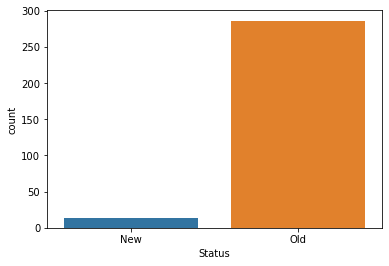

In [60]:
sns.countplot(x = 'Status', data = df2) # hiển thị số lượng dòng dữ liệu của Cũ và Mới

<AxesSubplot:xlabel='timestamp'>

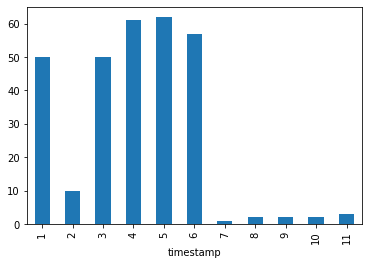

In [55]:
df2.groupby(df2["timestamp"].dt.month).ad_id.count().plot(kind="bar"

<AxesSubplot:title={'center':'Old'}, xlabel='timestamp'>

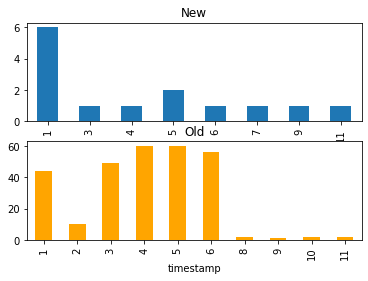

In [70]:
plt.subplot(2,1,1)
df2.query("Status == 'New'").groupby(df2["timestamp"].dt.month).ad_id.count().plot(kind="bar", title = "New")
plt.subplot(2,1,2)
df2.query("Status == 'Old'").groupby(df2["timestamp"].dt.month).ad_id.count().plot(kind="bar", title = "Old", color = "Orange")

<AxesSubplot:title={'center':'Old'}, xlabel='week'>

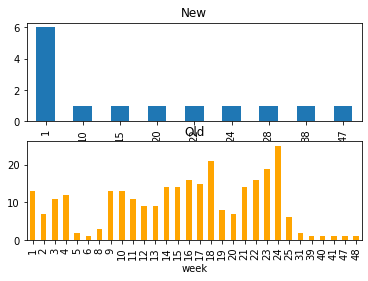

In [72]:
plt.subplot(2,1,1)
df2.query("Status == 'New'").groupby(df2["timestamp"].dt.isocalendar().week).ad_id.count().plot(kind="bar", title = "New")
plt.subplot(2,1,2)
df2.query("Status == 'Old'").groupby(df2["timestamp"].dt.isocalendar().week).ad_id.count().plot(kind="bar", title = "Old", color = "Orange")

```
Task 2:
Làm lại task 1, nhưng theo dõi số account cũ mới theo từng category_name. Để có dữ liệu tốt, nên chọn
10 ngành hàng phổ biến (có số lượng account_id tương tác nhiều)
Lựa chọn biểu đồ để thể hiện sự thay đổi của số account cũ/mới theo ngành hàng từ đó phát hiện ra ngành
hàng nào có tính bão hòa (số account cũ/mới ổn định), ngành hàng nào có khả năng thu hút thêm được
nhiều account mới.
```

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df3 = df.sort_values(by = ['category_name', 'timestamp']).head(500000)

In [4]:
#lấy ra 10 mặt hàng phổ biến nhất, ép kiểu dữ liệu data để xử lý
top10 = dict(df.groupby("category_name").ad_id.count().sort_values(ascending = False).head(10))

In [5]:
li = []
for key in top10:
    li.append(key)

In [6]:
li

['PTY-Houses',
 'Mobile Phones',
 'Motorbikes',
 'PTY-Land',
 'Computers, Laptops',
 'TV, Speakers, MP3 players',
 'Fridge',
 'Cars',
 'Rooster',
 'PTY-Office, Commercial Properties']

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df3 = df.query('category_name in @li').sort_values(by = ['category_name', 'timestamp'])#chỉ lấy những bản ghi là mặt hàng phổ biến

In [8]:
df3['timestamp'] = pd.to_datetime(df3['timestamp'])

In [12]:
# tính thời gian chênh lệch giữa các dòng khi có cùng account_id
catename = df3.iloc[0, 5]
time = df3.iloc[0, 3]
li2 = []
for i in range(len(df3)):
    if df3.iloc[i,5] == catename:
        li2.append(df3.iloc[i,3] - time)
        time = df3.iloc[i,3]
    else:
        catename = df3.iloc[i,5]
        time = df3.iloc[i,3]
        li2.append(df3.iloc[i,3] - time)

In [13]:
df3.insert(3, column = 'time3', value = li2)

In [14]:
df3

,account_id,ad_id,event_name,time3,timestamp,platform,category_name,region_name,condition_ad_name,price
1551408,509226232199178621,-25044157426451799,insert,0 days 00:00:00,2018-01-01 00:05:54.873258,unknown,Cars,Hà Nội,Đã sử dụng,265000000.0
1087313,5724346169180205472,-2573149064186991271,insert,0 days 00:01:53.916533,2018-01-01 00:07:48.789791,unknown,Cars,Hà Nội,Đã sử dụng,275000000.0
1361285,-908814590533046952,-5175782017493791112,insert,0 days 00:01:40.248006,2018-01-01 00:09:29.037797,unknown,Cars,Hà Nội,Đã sử dụng,265000000.0
1530509,1908764173730715601,-1324574144939734436,insert,0 days 00:03:36.975675,2018-01-01 00:13:06.013472,unknown,Cars,Hà Nội,Đã sử dụng,288000000.0
1551419,-4200356191859994321,3449797339056574640,insert,0 days 00:02:22.336138,2018-01-01 00:15:28.349610,unknown,Cars,Hà Nội,Đã sử dụng,178000000.0
...,...,...,...,...,...,...,...,...,...,...
1025508,-2520775370556631449,1147600264126499475,insert,0 days 00:02:10.319077,2018-12-31 23:20:02.737611,unknown,"TV, Speakers, MP3 players",Thanh Nghệ Tĩnh,NaN,5500000.0
1558491,-5153477020737668275,-3957688046477692125,insert,0 days 00:00:35.443544,2018-12-31 23:20:38.181155,unknown,"TV, Speakers, MP3 players",Hà Nội,NaN,600000.0
335826,7790587563145806542,888715729938654643,order,0 days 00:09:54.175405,2018-12-31 23:30:32.356560,ios,"TV, Speakers, MP3 players",Tp Hồ Chí Minh,NaN,123456000.0
4680268,-850020424817220776,7643925986987741658,insert,0 days 00:12:08.854202,2018-12-31 23:42:41.210762,unknown,"TV, Speakers, MP3 players",Hải Phòng Nam Định Thái Bình,NaN,1000000.0


In [15]:
time_01 = timedelta(days=30)
time_02 = timedelta(days=0)

In [17]:
li3 = []
for i in range(len(df3)):
    if ((df3.iloc[i,3] >= time_01) or (df3.iloc[i,3] == time_02 )):
        li3.append('New')
    else:
        li3.append('Old')

In [19]:
df3.insert(3, column = 'Status2', value = li3)

In [20]:
df3

,account_id,ad_id,event_name,Status2,time3,timestamp,platform,category_name,region_name,condition_ad_name,price
1551408,509226232199178621,-25044157426451799,insert,New,0 days 00:00:00,2018-01-01 00:05:54.873258,unknown,Cars,Hà Nội,Đã sử dụng,265000000.0
1087313,5724346169180205472,-2573149064186991271,insert,Old,0 days 00:01:53.916533,2018-01-01 00:07:48.789791,unknown,Cars,Hà Nội,Đã sử dụng,275000000.0
1361285,-908814590533046952,-5175782017493791112,insert,Old,0 days 00:01:40.248006,2018-01-01 00:09:29.037797,unknown,Cars,Hà Nội,Đã sử dụng,265000000.0
1530509,1908764173730715601,-1324574144939734436,insert,Old,0 days 00:03:36.975675,2018-01-01 00:13:06.013472,unknown,Cars,Hà Nội,Đã sử dụng,288000000.0
1551419,-4200356191859994321,3449797339056574640,insert,Old,0 days 00:02:22.336138,2018-01-01 00:15:28.349610,unknown,Cars,Hà Nội,Đã sử dụng,178000000.0
...,...,...,...,...,...,...,...,...,...,...,...
1025508,-2520775370556631449,1147600264126499475,insert,Old,0 days 00:02:10.319077,2018-12-31 23:20:02.737611,unknown,"TV, Speakers, MP3 players",Thanh Nghệ Tĩnh,NaN,5500000.0
1558491,-5153477020737668275,-3957688046477692125,insert,Old,0 days 00:00:35.443544,2018-12-31 23:20:38.181155,unknown,"TV, Speakers, MP3 players",Hà Nội,NaN,600000.0
335826,7790587563145806542,888715729938654643,order,Old,0 days 00:09:54.175405,2018-12-31 23:30:32.356560,ios,"TV, Speakers, MP3 players",Tp Hồ Chí Minh,NaN,123456000.0
4680268,-850020424817220776,7643925986987741658,insert,Old,0 days 00:12:08.854202,2018-12-31 23:42:41.210762,unknown,"TV, Speakers, MP3 players",Hải Phòng Nam Định Thái Bình,NaN,1000000.0


In [ ]:
plt.subplot(2,1,1)
df2.query("Status == 'New'").groupby(df2["timestamp"].dt.month).ad_id.count().plot(kind="bar", title = "New")
plt.subplot(2,1,2)
df2.query("Status == 'Old'").groupby(df2["timestamp"].dt.month).ad_id.count().plot(kind="bar", title = "Old", color = "Orange")

<AxesSubplot:title={'center':'Old'}, xlabel='timestamp'>

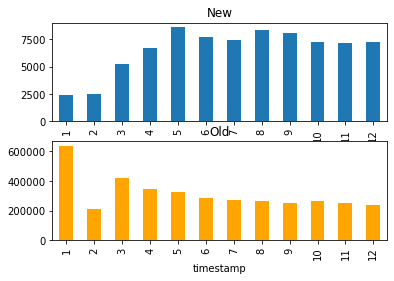

In [27]:
plt.subplot(2,1,1)
df3.query("Status2 == 'New'").groupby(df3['timestamp'].dt.month).ad_id.count().plot(kind = 'bar', title = "New")
plt.subplot(2,1,2)
df3.query("Status2 == 'Old'").groupby(df3['timestamp'].dt.month).ad_id.count().plot(kind = 'bar', title = "Old", color = "Orange")